### All four classifiers(KNN, decision tree,svm,logistic regression) are used in this project to determine the best model.
### svm(linear kerneling) and logistic regression gives the highest accuracy than the other classifires and it seems this dataset is separable by a sigmoid function(LR) or a hyperplane(svm) in higher dimensions.


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\mohad\Downloads\16325569497737558.csv")
df.head()
#print(df['output'].value_counts())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x=df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','thall','caa']].values
x[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   1. ,   0. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   2. ,   0. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   2. ,   0. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   2. ,   0. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   2. ,   0. ]])

In [4]:
y=df[['output']].values
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [5]:
df.shape
df.dtypes
print(df['caa'].value_counts()) 

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


### Removing value 4 of caa column

In [100]:
indexes=df.index[df['caa'] == 4].tolist()
print(indexes)
df=df.drop(df.index[indexes])   
print(df['caa'].value_counts())

[92, 158, 163, 164, 251]
0    175
1     65
2     38
3     20
Name: caa, dtype: int64


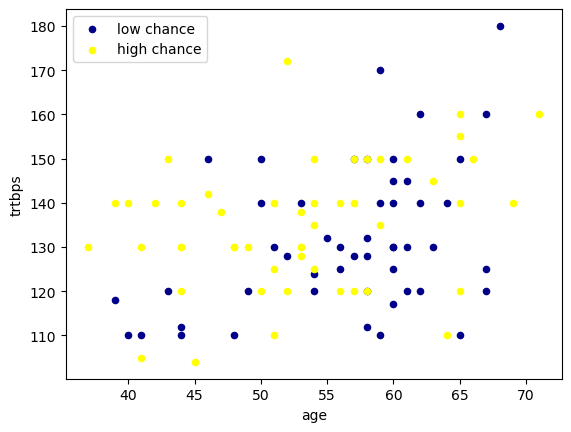

In [7]:
ax =df[df['output'] == 0][0:50].plot(kind='scatter', x='age', y='trtbps', color='DarkBlue', label='low chance');
df[df['output'] == 1][0:50].plot(kind='scatter', x='age', y='trtbps', color='Yellow', label='high chance', ax=ax);
plt.show()

## SVM Model

### creating a loop through different kernel functions to see which one has the higher accuracy.
### the linear kerneling gives an f1 score as 0.92 which is the best for this dataset.

### scaling and fitting data on normal distribution chart. because some features like age and chol differ greatly in their range and in svm modeling we need to calculate the distance of data points.

In [6]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
x = scaler.fit(x).transform(x)
x[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -2.14887271, -0.71442887],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.51292188, -0.71442887],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.51292188, -0.71442887],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.51292188, -0.71442887],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.51292188, -0.71442887]])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242, 1)
Test set: (61, 13) (61, 1)


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### training model and evaluation by test dataset.

[0 0 1 1 0]
[[1]
 [0]
 [1]
 [1]
 [0]]
kernel function:rbf
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

Confusion matrix, without normalization
[[24  1]
 [ 7 29]]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


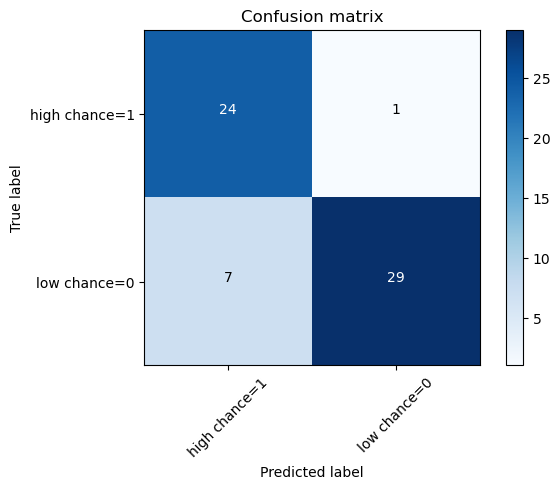

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 0 1 1]
[[1]
 [0]
 [1]
 [1]
 [0]]
kernel function:linear
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[23  2]
 [ 4 32]]


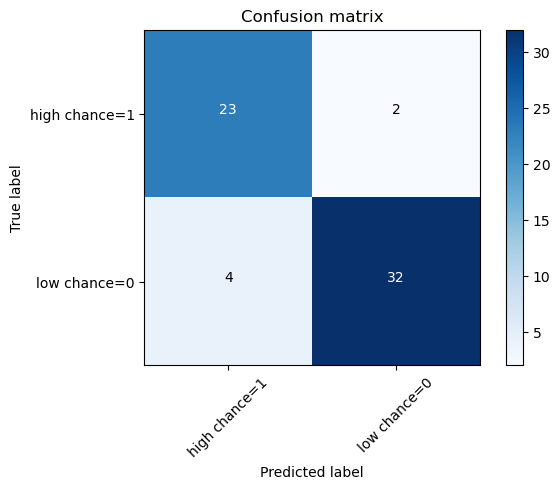

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 1 1 1]
[[1]
 [0]
 [1]
 [1]
 [0]]
kernel function:sigmoid
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61

Confusion matrix, without normalization
[[21  4]
 [ 3 33]]


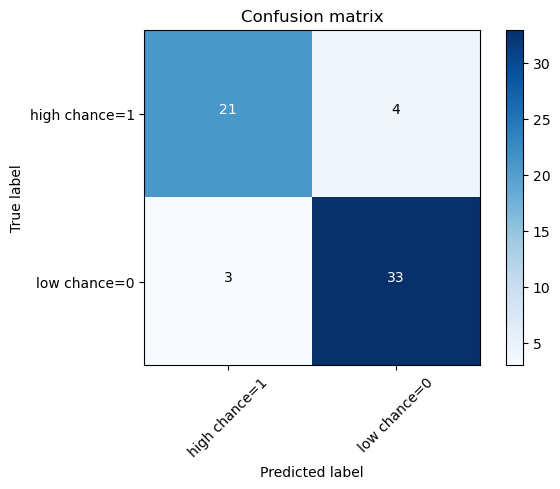

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 1 1 1]
[[1]
 [0]
 [1]
 [1]
 [0]]
kernel function:poly
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.83      0.83      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion matrix, without normalization
[[19  6]
 [ 6 30]]


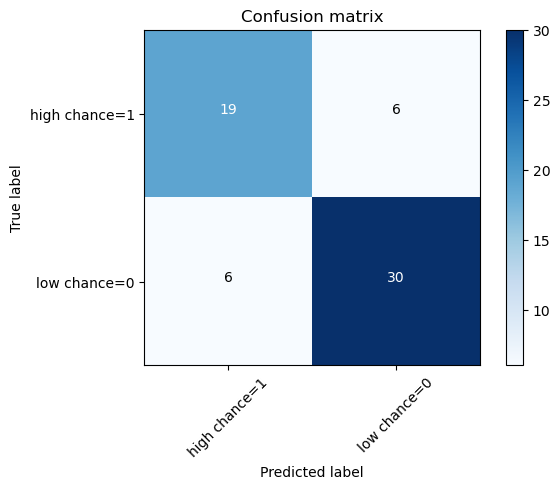

In [12]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
kernels=['rbf','linear','sigmoid','poly']
for kernelf in kernels:
    svmModel=svm.SVC(kernel=kernelf)
    svmModel.fit(x_train,y_train)
    yhat=svmModel.predict(x_test)
    print(yhat[:5])
    print(y_test[:5])
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
    np.set_printoptions(precision=2)
    print("kernel function:"+kernelf)
    print (classification_report(y_test, yhat))
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['high chance=1','low chance=0'],title='Confusion matrix')
    

## Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier
treeModel=DecisionTreeClassifier(criterion='entropy',min_samples_split=6)
treeModel.fit(x_train,y_train)
yhat2=treeModel.predict(x_test)
print(yhat[:5])
print(y_test[:5])

[0 0 1 1 0]
[[1]
 [0]
 [1]
 [1]
 [0]]


## Evaluation

DecisionTrees's Accuracy:  0.8524590163934426
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.91      0.81      0.85        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

Confusion matrix, without normalization
[[22  3]
 [ 7 29]]


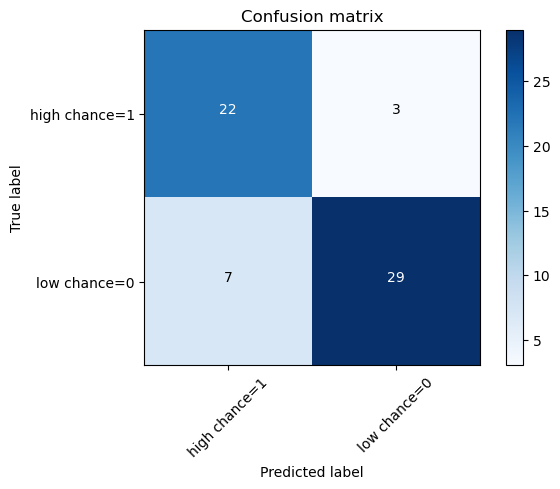

In [18]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print (classification_report(y_test, yhat2))
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high chance=1','low chance=0'],title='Confusion matrix')

## KNN Model

## Evaluation
### creating a loop through different k values to determine the value which gives the highest accuracy.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=1 is 0.7704918032786885
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        25
           1       0.84      0.75      0.79        36

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61

Confusion matrix, without normalization
[[20  5]
 [ 9 27]]


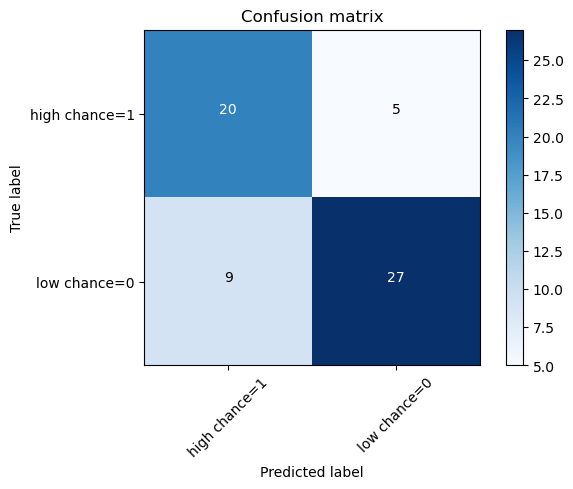

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=2 is 0.7704918032786885
              precision    recall  f1-score   support

           0       0.66      0.92      0.77        25
           1       0.92      0.67      0.77        36

    accuracy                           0.77        61
   macro avg       0.79      0.79      0.77        61
weighted avg       0.81      0.77      0.77        61

Confusion matrix, without normalization
[[23  2]
 [12 24]]


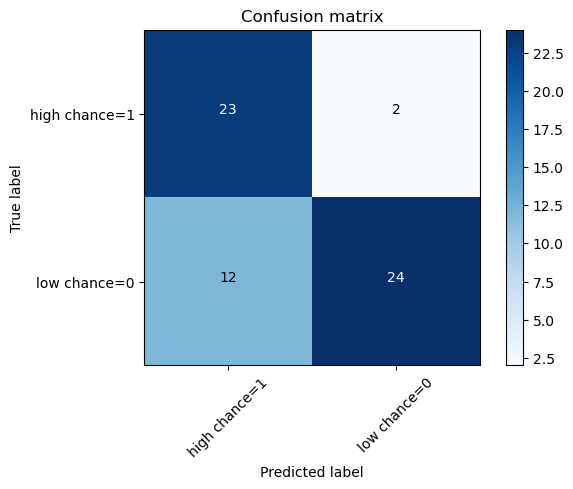

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=3 is 0.8032786885245902
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion matrix, without normalization
[[20  5]
 [ 7 29]]


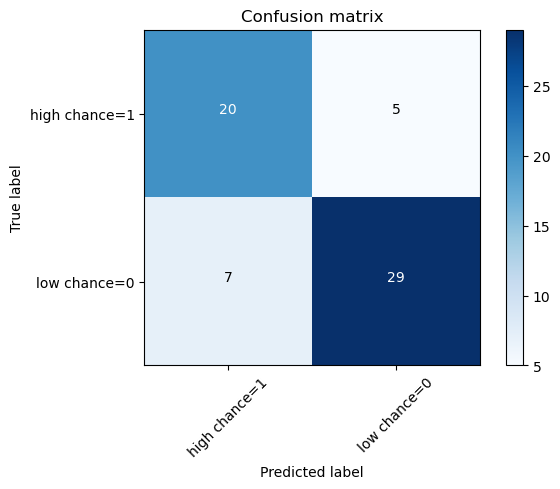

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=4 is 0.8032786885245902
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        25
           1       0.90      0.75      0.82        36

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61

Confusion matrix, without normalization
[[22  3]
 [ 9 27]]


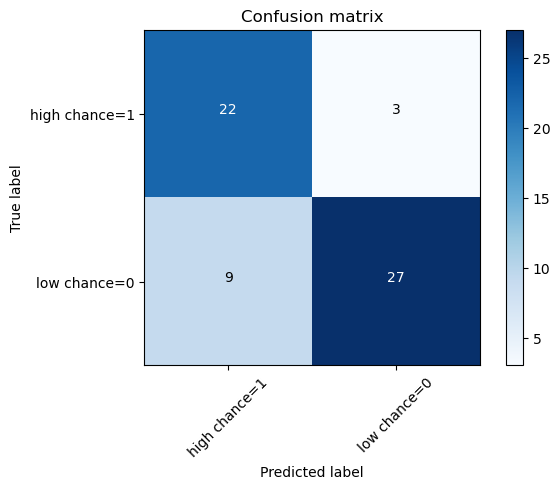

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=5 is 0.8032786885245902
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion matrix, without normalization
[[20  5]
 [ 7 29]]


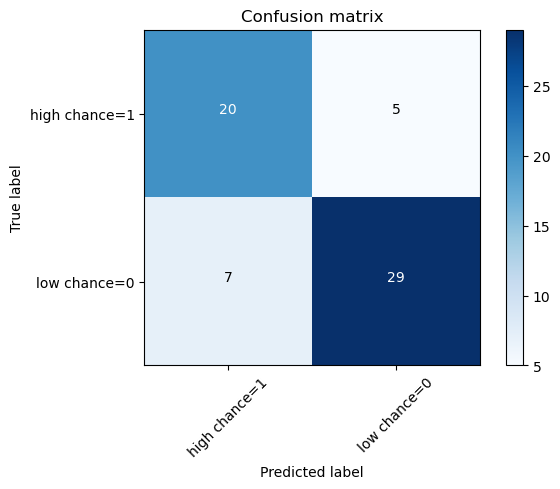

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=6 is 0.819672131147541
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        25
           1       0.93      0.75      0.83        36

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61

Confusion matrix, without normalization
[[23  2]
 [ 9 27]]


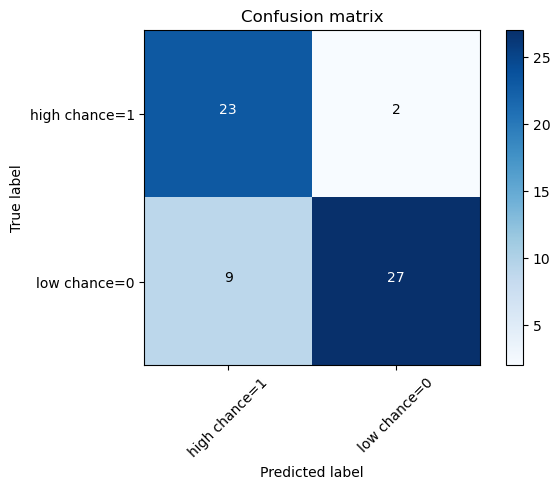

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=7 is 0.8360655737704918
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.88      0.83      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix, without normalization
[[21  4]
 [ 6 30]]


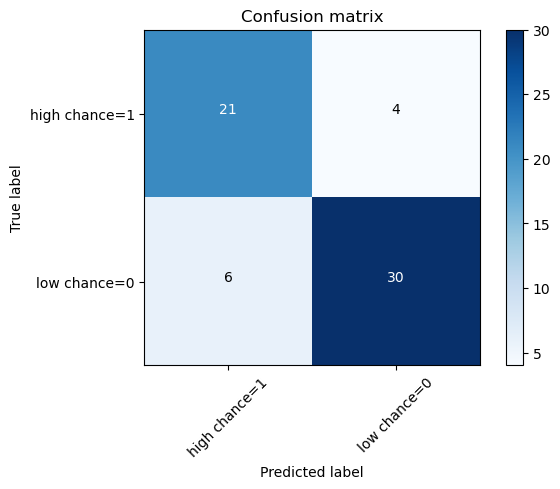

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=8 is 0.819672131147541
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.90      0.78      0.84        36

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61

Confusion matrix, without normalization
[[22  3]
 [ 8 28]]


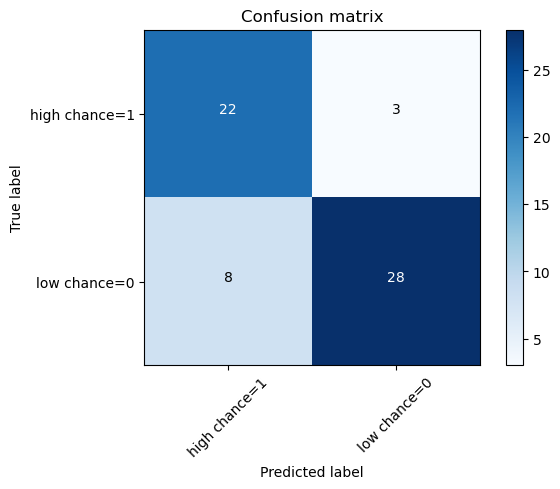

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=9 is 0.819672131147541
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.86      0.83      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.82      0.82      0.82        61

Confusion matrix, without normalization
[[20  5]
 [ 6 30]]


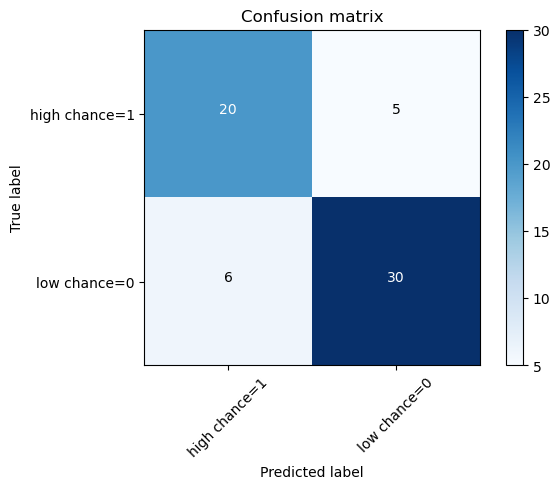

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score with k=10 is 0.8524590163934426
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.94      0.81      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

Confusion matrix, without normalization
[[23  2]
 [ 7 29]]


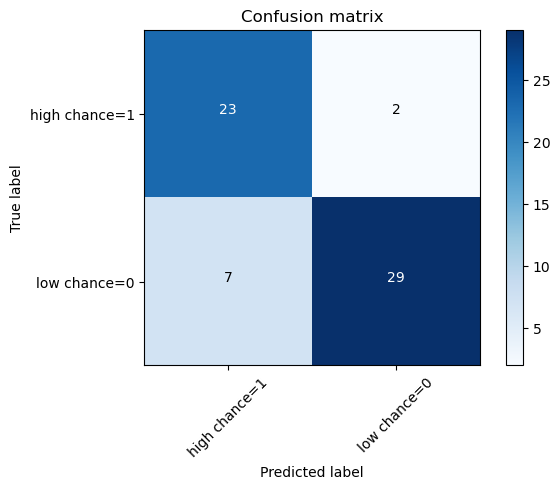

the best k value is 0.8524590163934426 with k : 10.0


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks=11
k_values=np.zeros((ks-1))
acc_score=np.zeros((ks-1))
for k in range(1,ks):
    knnModel=KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    yhat3=knnModel.predict(x_test)
    acc_score[k-1]=metrics.accuracy_score(y_test, yhat3)
    k_values[k-1]=k
    print("Accuracy score with k="+str(k)+" is "+str(acc_score[k-1]))
    print (classification_report(y_test, yhat3))
    cnf_matrix = confusion_matrix(y_test, yhat3, labels=[0,1])
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['high chance=1','low chance=0'],title='Confusion matrix')
print("the best accuracy score is "+ str(acc_score.max())+" with k : "+str(k_values.max()))


## LogisticRegression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LRModel = LogisticRegression(C=0.01, solver='newton-cholesky').fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
yhat4 = LRModel.predict(x_test)
print(yhat4[:5])
print(y_test[:5])

[1 0 1 1 1]
[[1]
 [0]
 [1]
 [1]
 [0]]


## Evaluation

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

Confusion matrix, without normalization
[[20  5]
 [ 1 35]]


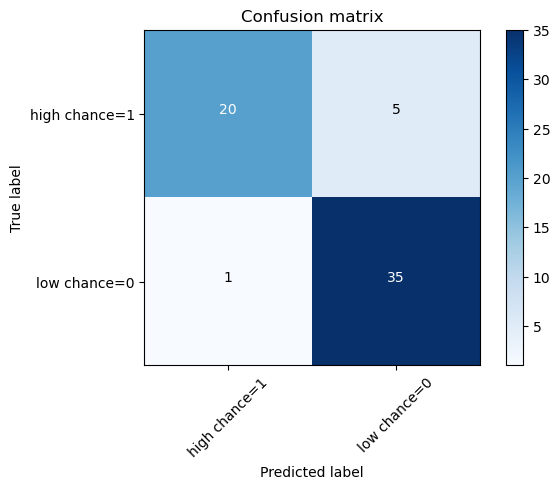

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat4))
cnf_matrix = confusion_matrix(y_test, yhat4, labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high chance=1','low chance=0'],title='Confusion matrix')